***Project Name*** - Netflix Content Analysis




***Project Type*** - EDA and Unsupervised Learning

***Contribution*** - Individual

***Project Summary*** - This project aims to explore a dataset of TV shows and movies available on Netflix as of 2019. The analysis will involve understanding the different types of content, their distribution across countries, and trends in Netflix's focus on TV shows versus movies. Furthermore, the project will employ text-based features from the dataset to cluster similar content, potentially revealing hidden thematic relationships. The main libraries used will be Pandas for data manipulation, Matplotlib and Seaborn for visualization, and scikit-learn for text processing and clustering. The insights gained from this analysis can be valuable for Netflix stakeholders in understanding their content library, identifying potential areas for growth, and improving content recommendation systems.

***GitHub Link*** - (Provide your GitHub Link here once the project is complete)


***Problem Statement***

The problem is to analyze a Netflix dataset to extract meaningful insights about the available content. This includes understanding the distribution of content types (TV shows vs. movies), geographical availability, and recent trends in content focus. Additionally, the project aims to identify clusters of similar content based on their textual descriptions.

***Define Your Business Objective?***

The primary business objective is to provide Netflix stakeholders with a deeper understanding of their content library. This understanding can inform strategic decisions related to content acquisition, production, and recommendation algorithms. Specific objectives include:

Identifying key countries where different content types are most prevalent.
Determining if there's a discernible shift in Netflix's focus towards TV shows over movies.
Discovering natural groupings of content based on shared themes or descriptions.
Providing data-driven insights that can potentially enhance user engagement and satisfaction.

 ***Import Libraries***

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data (run this once)
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')
try:
    WordNetLemmatizer().lemmatize('running')
except LookupError:
    nltk.download('wordnet')
try:
    nltk.data.find('taggers/averaged_perceptron_tagger/averaged_perceptron_tagger.zip')
except LookupError:
    nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


***Load Dataset***

In [2]:
df = pd.read_csv('/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

 ***Dataset First View***

In [3]:
print(df.head())

  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4   

 ***Dataset Rows & Columns Coun***

In [4]:
# Dataset Rows & Columns count
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns: {df.shape[1]}')

Number of rows: 7787
Number of columns: 12


 ***Dataset Information***

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


***Duplicate Values***

In [6]:
# Dataset Duplicate Value Count
print(f'Number of duplicate rows: {df.duplicated().sum()}')

Number of duplicate rows: 0


***Missing Values/Null Values Count***

In [7]:
# Missing Values/Null Values Count
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


***Visualizing Missing Values***

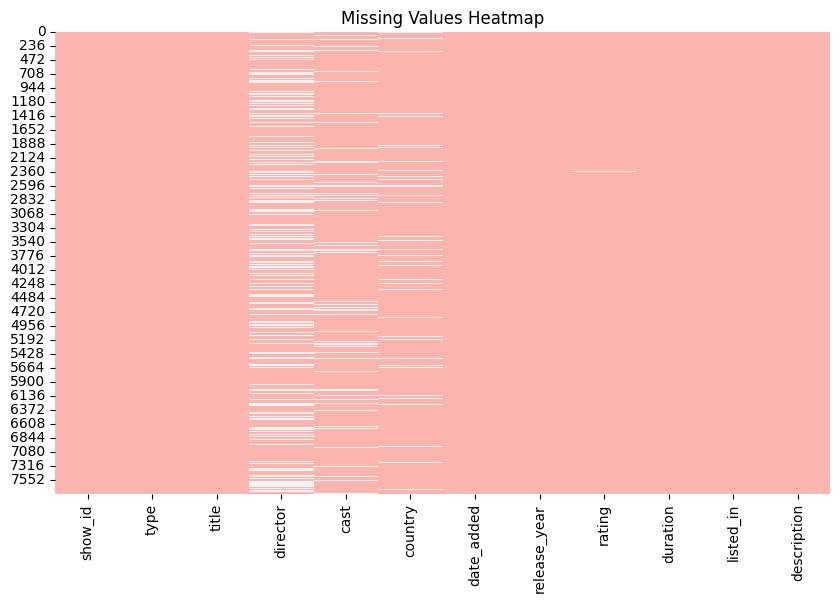

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='Pastel1')  # change 'coolwarm' to others to test
plt.title('Missing Values Heatmap')
plt.show()


What did you know about your dataset?

The dataset contains information about TV shows and movies available on Netflix as of 2019. It includes details such as the show ID, type (Movie or TV Show), title, director, cast, country of production, date added to Netflix, release year, rating, duration, listed genres, and a brief description. There are missing values in several columns, particularly 'director', 'cast', 'country', and 'date_added'. The 'description' column has no missing values, which is useful for text-based analysis. There are no duplicate rows in the dataset.



***DataSet columns***

In [11]:
# Dataset Columns
print(df.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


***Dataset Describe***

In [12]:
# Dataset Describe
print(df.describe(include='all'))

       show_id   type                                    title  \
count     7787   7787                                     7787   
unique    7787      2                                     7787   
top      s7787  Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   
freq         1   5377                                        1   
mean       NaN    NaN                                      NaN   
std        NaN    NaN                                      NaN   
min        NaN    NaN                                      NaN   
25%        NaN    NaN                                      NaN   
50%        NaN    NaN                                      NaN   
75%        NaN    NaN                                      NaN   
max        NaN    NaN                                      NaN   

                      director                cast        country  \
count                     5398                7069           7280   
unique                    4049                6831            681   


Variables Description

*   show_id: Unique identifier for each title.
*   type: Categorical variable indicating if it's a 'Movie' or a 'TV Show'












 ***Check Unique Values for each variable.***

In [13]:
for col in df.columns:
    print(f'Unique values in {col}: {df[col].nunique()}')
    if df[col].nunique() < 20:
        print(f'  Values: {df[col].unique()}')
    print('-' * 50)

Unique values in show_id: 7787
--------------------------------------------------
Unique values in type: 2
  Values: ['TV Show' 'Movie']
--------------------------------------------------
Unique values in title: 7787
--------------------------------------------------
Unique values in director: 4049
--------------------------------------------------
Unique values in cast: 6831
--------------------------------------------------
Unique values in country: 681
--------------------------------------------------
Unique values in date_added: 1565
--------------------------------------------------
Unique values in release_year: 73
--------------------------------------------------
Unique values in rating: 14
  Values: ['TV-MA' 'R' 'PG-13' 'TV-14' 'TV-PG' 'NR' 'TV-G' 'TV-Y' nan 'TV-Y7' 'PG'
 'G' 'NC-17' 'TV-Y7-FV' 'UR']
--------------------------------------------------
Unique values in duration: 216
--------------------------------------------------
Unique values in listed_in: 492
-------------

 ***Code to make your dataset analysis ready.***

In [15]:
# Handle missing values in 'director' and 'cast' by filling with 'Unknown'
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)

# Handle missing values in 'country' by filling with the mode (most frequent country)
df['country'].fillna(df['country'].mode()[0], inplace=True)

# Convert 'date_added' to datetime objects
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')


# Extract year and month added
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()

# Separate duration into value and unit
df[['duration_value', 'duration_unit']] = df['duration'].str.split(' ', expand=True)

# Convert 'duration_value' to numeric
df['duration_value'] = pd.to_numeric(df['duration_value'], errors='coerce')

# Handle missing values in 'rating' with the mode
df['rating'].fillna(df['rating'].mode()[0], inplace=True)

# Handle potential missing values after conversion
df.dropna(subset=['duration_value'], inplace=True)
df['duration_value'] = df['duration_value'].astype(int)

print(df.isnull().sum())
print(df.head())

show_id            0
type               0
title              0
director           0
cast               0
country            0
date_added        98
release_year       0
rating             0
duration           0
listed_in          0
description        0
year_added        98
month_added       98
duration_value     0
duration_unit      0
dtype: int64
  show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim 

<ipython-input-15-ca3802a63c75>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna(df['rating'].mode()[0], inplace=True)


***What all manipulations have you done and insights you found?***

*   Missing Value Handling: Missing values in 'director' and 'cast' were replaced with 'Unknown' as these are categorical and indicating absence is more informative than imputation. Missing values in 'country' and 'rating' were filled with their respective modes, as these are also categorical and the mode represents the most frequent occurrence. 'date_added' was converted to datetime objects, and year and month added were extracted for temporal analysis. The 'duration' column was split into 'duration_value' and 'duration_unit', with 'duration_value' converted to a numeric type. Rows with missing values after this split were dropped.
*   Feature Engineering: New features 'year_added' and 'month_added' were created from the 'date_added' column. The 'duration' column was split to allow for numerical analysis of the duration.

*   Data Type Conversion: Ensured that 'date_added' is in datetime format and 'duration_value' is numeric.






 Univariate Analysis

***Chart 1: Count of Movie vs TV Show***



<ipython-input-17-5aa6e267a735>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Pastel1')


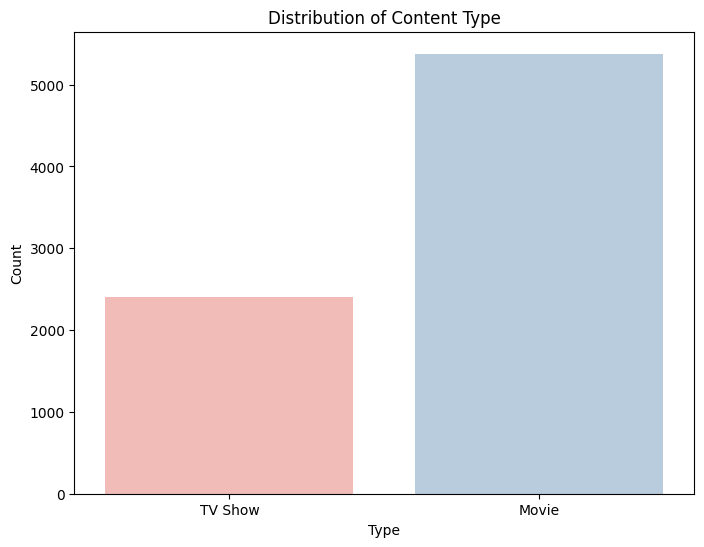

In [17]:
# Chart - 1
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='type', palette='Pastel1')
plt.title('Distribution of Content Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

1. Why did you pick the specific chart?

A count plot is ideal for visualizing the distribution of a categorical variable, in this case, the 'type' of content (Movie or TV Show). It clearly shows the frequency of each category.

2. What is/are the insight(s) found from the chart?

The chart shows that there are significantly more movies than TV shows in the dataset.

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

This insight provides a baseline understanding of Netflix's content library composition in 2019. Knowing the dominance of movies might inform decisions about future content acquisition or production. If the trend reported by Flixable (tripling of TV shows since 2010 and decrease in movies) is something Netflix wants to continue, they might focus more on acquiring or producing TV shows. Conversely, if movie viewership is higher, maintaining a large movie library is crucial for user satisfaction. There isn't necessarily a negative growth implication here, but it highlights the current balance that Netflix needs to consider in its future strategies.

***Chart 2: Top 10 Countries Producing Content***

<ipython-input-19-72ce16861921>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette='Pastel1')


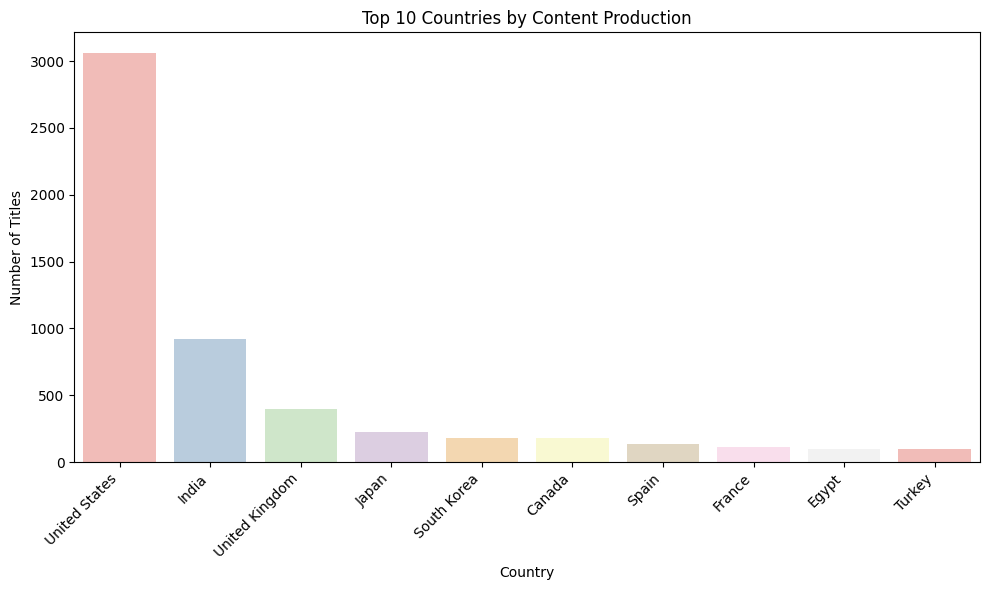

In [19]:
# Chart - 2
country_counts = df['country'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.index, y=country_counts.values, palette='Pastel1')
plt.title('Top 10 Countries by Content Production')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

1. Why did you pick the specific chart?

A bar plot is suitable for comparing the counts of different categories, in this case, the top 10 countries with the most content on Netflix. It allows for easy visual comparison of the number of titles produced by each country.

2. What is/are the insight(s) found from the chart?

The United States has a significantly higher number of content titles compared to other countries. India and the United Kingdom also have a substantial amount of content.

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the primary sources of content can inform Netflix's international content strategy. Focusing on regions with high production volume like the US, India, and the UK might be beneficial for acquiring popular content. However, neglecting content from other regions could lead to a less diverse library and potentially alienate subscribers interested in international content, which could hinder growth in those regions. A balanced approach considering both popular and diverse content sources is important.

***Chart-3 Rating Analysis Of Movies and Tv Shows***

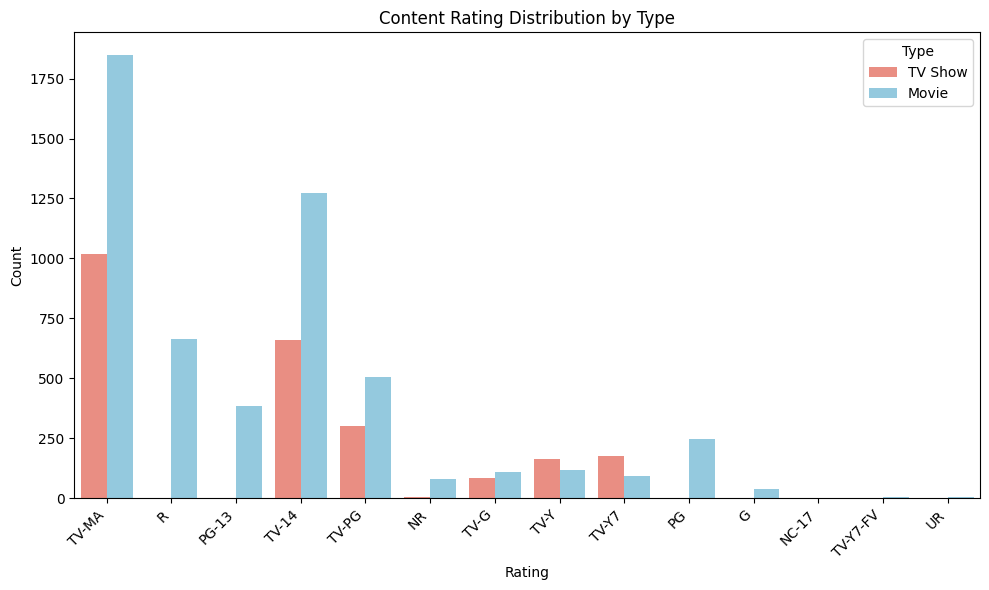

In [20]:
# Chart - 3
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='rating', hue='type', palette={'Movie': 'skyblue', 'TV Show': 'salmon'})
plt.title('Content Rating Distribution by Type')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Type')
plt.tight_layout()
plt.show()

1. Why did you pick the specific chart?

A grouped count plot (using the hue parameter) allows us to see the distribution of content ratings for both Movies and TV Shows side-by-side. This helps in understanding if the rating patterns differ between the two content types.

2. What is/are the insight(s) found from the chart?

TV-MA (Mature Audiences) is the most common rating for both movies and TV shows. There are also a significant number of TV-14 and R-rated movies. TV shows have a notable presence in the TV-14 and TV-PG categories.

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the distribution of ratings can inform content acquisition and production strategies to align with viewer preferences and parental control needs. A heavy skew towards mature content might limit viewership from younger audiences and families, potentially hindering growth in those segments. Conversely, a lack of mature content might dissatisfy adult subscribers. Maintaining a diverse range of ratings is crucial to cater to a broad audience and ensure positive growth across different demographics.

 ***Chart 4: Distribution of Rele***ase Years

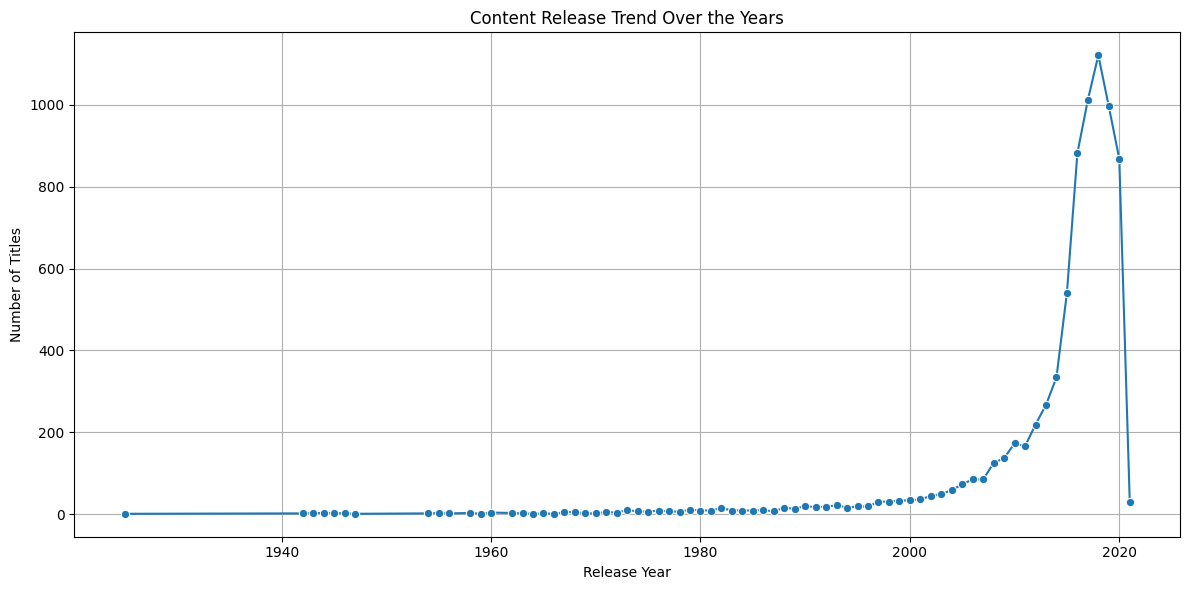

In [21]:
# Chart - 4
release_year_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=release_year_counts.index, y=release_year_counts.values, marker='o')
plt.title('Content Release Trend Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.tight_layout()
plt.show()

1. Why did you pick the specific chart?

A line plot is effective for visualizing trends over time. In this case, it shows how the number of released titles added to Netflix has changed over the years.

2. What is/are the insight(s) found from the chart?

There has been a significant increase in the number of titles released in recent years (post-2010), indicating a growing volume of content being added to Netflix.

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

This trend suggests Netflix is continuously expanding its content library, which is generally a positive sign for attracting and retaining subscribers. However, a rapid increase in content without maintaining quality could lead to subscriber dissatisfaction and potentially negative growth. It's important for Netflix to balance the quantity of content with its quality and relevance to different audience segments.

***Chart:5 Kernel Density Estimate***

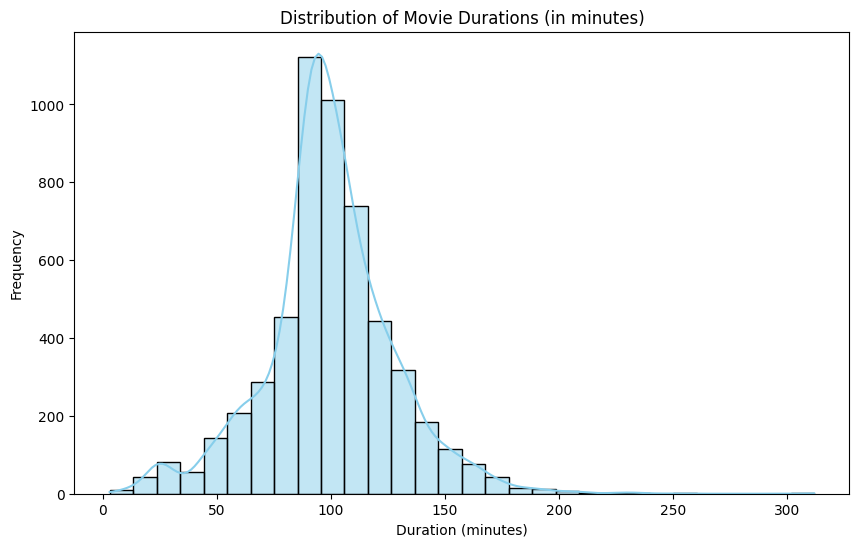

In [22]:
# Chart - 5
plt.figure(figsize=(10, 6))
sns.histplot(data=df[df['type'] == 'Movie'], x='duration_value', kde=True, color='skyblue', bins=30)
plt.title('Distribution of Movie Durations (in minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

1. Why did you pick the specific chart?

A histogram is used to visualize the distribution of a numerical variable, in this case, the duration of movies. The KDE (Kernel Density Estimate) line helps to smooth the distribution and see the overall shape.

2. What is/are the insight(s) found from the chart?

The distribution of movie durations is somewhat right-skewed, with a peak around 90-100 minutes, indicating that most movies are feature-length films. There are also some longer movies, extending beyond 150 minutes.

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the typical movie lengths can inform content acquisition and help set expectations for viewers. If a significant portion of the audience prefers shorter or longer content, Netflix might want to adjust its acquisition strategy accordingly. A mismatch between the available movie durations and user preferences could potentially lead to lower engagement.

 ***Chart:6 Frequency of different numbers of seasons for TV shows***

<ipython-input-23-c85c761ba97b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tv_show_durations.index, y=tv_show_durations.values, palette='viridis')


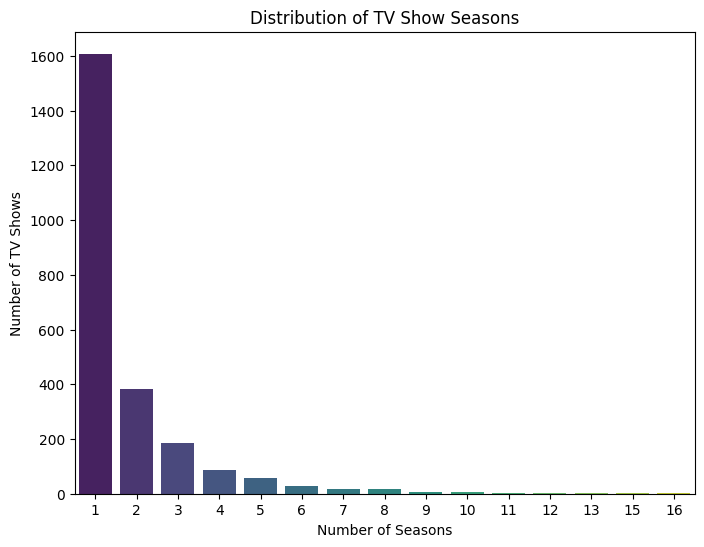

In [23]:
# Chart - 6
tv_show_durations = df[df['type'] == 'TV Show']['duration_value'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
sns.barplot(x=tv_show_durations.index, y=tv_show_durations.values, palette='viridis')
plt.title('Distribution of TV Show Seasons')
plt.xlabel('Number of Seasons')
plt.ylabel('Number of TV Shows')
plt.show()

1. Why did you pick the specific chart?

A bar plot is suitable for displaying the frequency of different numbers of seasons for TV shows, which is a discrete numerical variable.

2. What is/are the insight(s) found from the chart?

The majority of TV shows on Netflix have either 1 or 2 seasons. The number of shows decreases significantly as the number of seasons increases.

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

This insight is valuable for understanding the typical lifespan of TV shows on the platform. Knowing that most shows have a limited number of seasons might influence decisions about renewing shows or focusing on creating more limited series. If users prefer longer-running shows and Netflix primarily offers shorter ones, it could lead to dissatisfaction and potentially higher churn rates. Balancing the portfolio with shows of varying lengths is important.

***Chart-7 Top 10 genres***

<ipython-input-25-75c36a511c20>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='Pastel1')


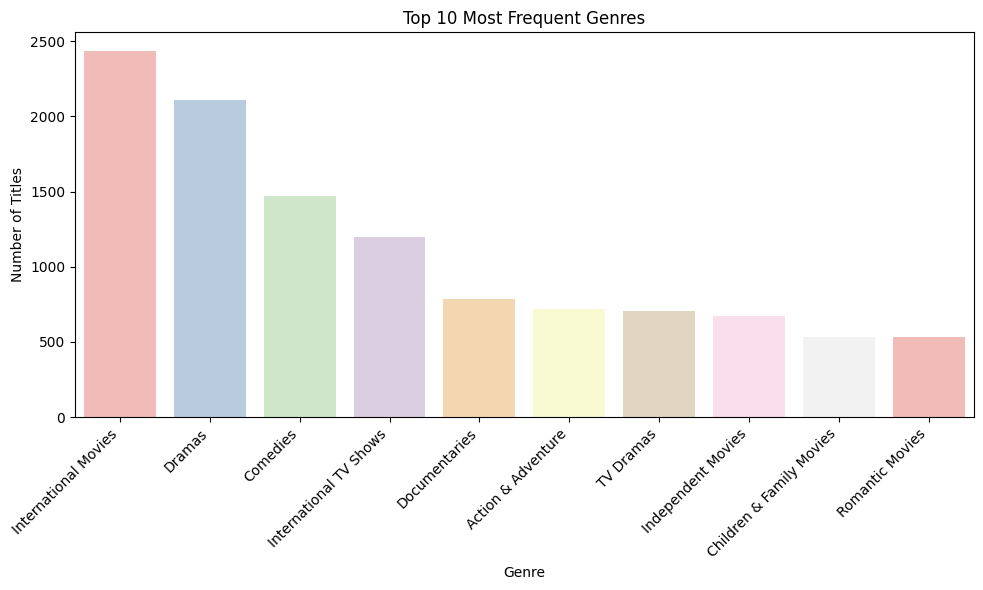

In [25]:
# Chart - 7
genre_counts = pd.Series([genre.strip() for sublist in df['listed_in'].str.split(',') for genre in sublist]).value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='Pastel1')
plt.title('Top 10 Most Frequent Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



1.   Why did you pick the specific chart?
A bar plot is effective for visualizing and comparing the counts of different categories, in this case, the top 10 most frequent genres. It allows for easy comparison of the popularity or prevalence of each genre within the Netflix dataset.
2.   What is/are the insight(s) found from the chart?
International Movies and Dramas are the most frequently listed genres in the dataset, followed by Comedies and International TV Shows. This suggests a strong focus on international content and dramatic storytelling, with a significant presence of comedies as well.

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason. 1
Positive Business Impact: Understanding the most prevalent genres can guide Netflix's content acquisition and production strategies. Focusing on popular genres like International Movies, Dramas, and Comedies could lead to higher viewership and subscriber satisfaction. This information can also be valuable for improving recommendation algorithms, ensuring users are presented with content they are more likely to enjoy.

Potential for Negative Growth: Over-emphasizing only the top genres and neglecting less frequent ones could lead to a less diverse content library. This might alienate subscribers with niche interests, potentially increasing churn rates within those specific user segments. Additionally, solely focusing on past successes might make Netflix slow to adapt to emerging genre trends or miss opportunities to cater to evolving audience preferences. A balanced approach that includes both popular and diverse content is crucial for long-term positive growth.



 ***Chart 8 : Relationship between the release year of content and the year***

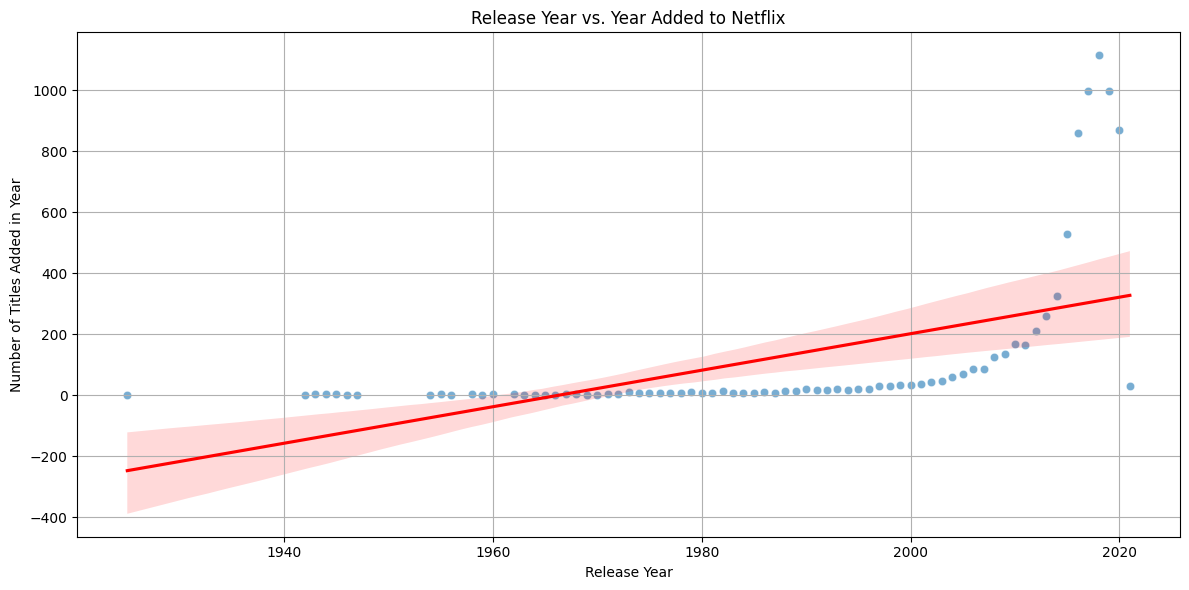

In [26]:
# Chart - 8
release_year_added = df.groupby('release_year')['year_added'].count().reset_index()
plt.figure(figsize=(12, 6))
sns.scatterplot(data=release_year_added, x='release_year', y='year_added', alpha=0.6)
sns.regplot(data=release_year_added, x='release_year', y='year_added', scatter=False, color='red')
plt.title('Release Year vs. Year Added to Netflix')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles Added in Year')
plt.grid(True)
plt.tight_layout()
plt.show()

1. Why did you pick the specific chart?

A scatter plot with a regression line helps to visualize the relationship between the release year of content and the year it was added to Netflix. The regression line can indicate any trend in how quickly content is added after its release.

2. What is/are the insight(s) found from the chart?

The majority of content added in a given year tends to be from more recent release years, as expected. However, there's also a noticeable amount of older content being added, suggesting Netflix also curates and adds classic or previously released titles to its library. The regression line shows a general upward trend, indicating that more content overall is being added in recent years, and these additions are also skewed towards more recent releases.

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

This insight confirms that Netflix's content additions are heavily weighted towards recent productions, which is likely to cater to current audience preferences. The inclusion of older content adds value by offering a wider variety and potentially attracting viewers interested in classics. A potential negative impact could arise if the balance shifts too heavily towards recent content, neglecting viewers who appreciate a diverse library spanning different eras. Maintaining a good mix of new and old content is important for broad appeal.

 ***Chart -9 The top 10 countries that produce both types of content.***

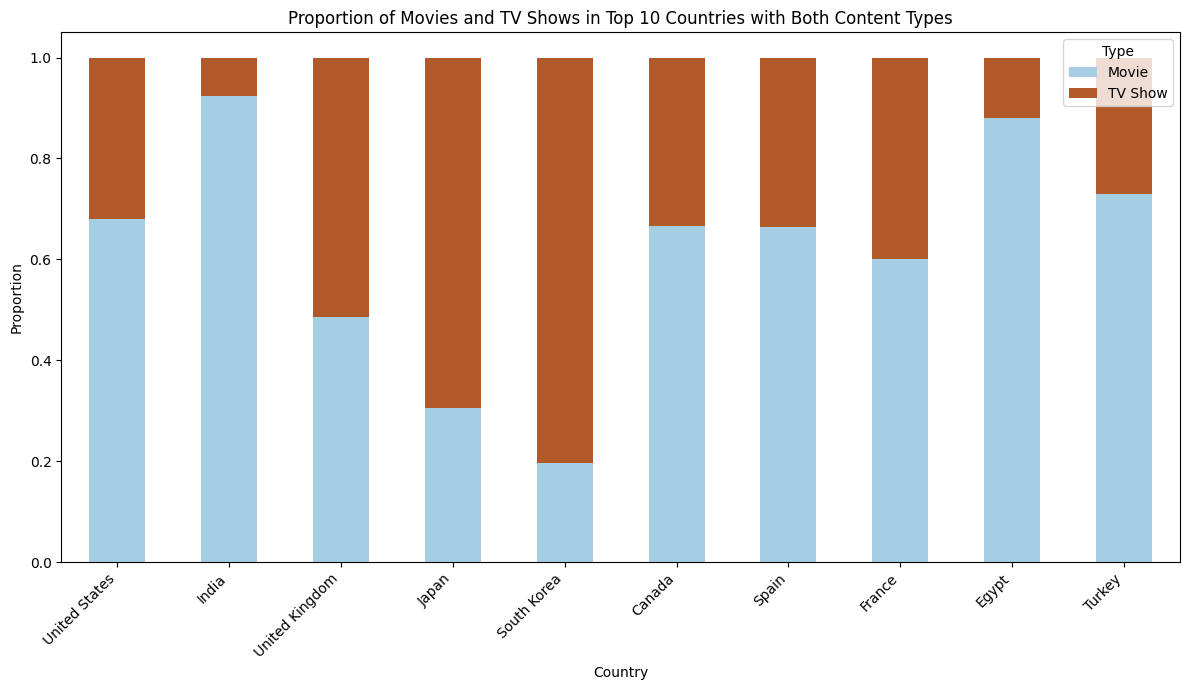

In [27]:
# Chart - 9
countries_with_both = df.groupby('country')['type'].nunique()
countries_both_types = countries_with_both[countries_with_both == 2].index.tolist()
df_both_types = df[df['country'].isin(countries_both_types)]
country_type_both = df_both_types.groupby('country')['type'].value_counts(normalize=True).unstack().fillna(0)
top_countries_both = df_both_types['country'].value_counts().nlargest(10).index
country_type_both_top10 = country_type_both.loc[top_countries_both]

country_type_both_top10.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='Paired')
plt.title('Proportion of Movies and TV Shows in Top 10 Countries with Both Content Types')
plt.xlabel('Country')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Type')
plt.tight_layout()
plt.show()

1. Why did you pick the specific chart?

A stacked bar chart is used to visualize the proportion of movies and TV shows within the top 10 countries that produce both types of content. This provides a more focused comparison of content type balance in countries with a diverse production portfolio.

2. What is/are the insight(s) found from the chart?

Even among countries that produce both movies and TV shows, the proportions vary. For instance, India still shows a higher proportion of movies, while the UK and Canada show a relatively larger proportion of TV shows. The US maintains a more balanced mix.

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

This refined view helps Netflix understand the nuances of content production in key markets. It reinforces the idea that regional preferences might exist. Tailoring content acquisition and production strategies to these regional balances could lead to higher user satisfaction. Ignoring these differences could result in a mismatch between the content offered and the preferences of subscribers in those regions, potentially hindering growth.

***Chart 10: TV Shows vs Movies Over the Years***


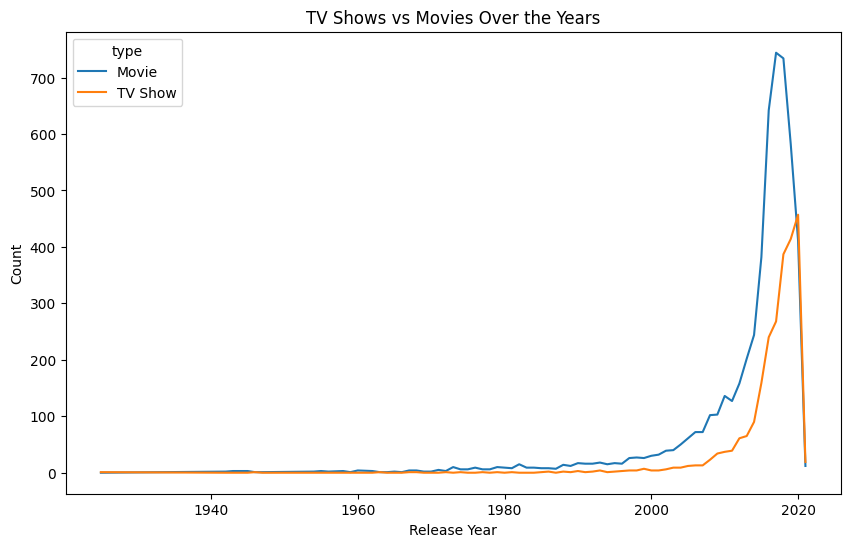

In [31]:
df_year_type = df.groupby(['release_year', 'type']).size().unstack().fillna(0)
df_year_type.plot(kind='line', figsize=(10,6))
plt.title('TV Shows vs Movies Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()




1. Why did you pick the specific chart?

A line plot is chosen to visualize the trend of the number of movies and TV shows released over the years. It effectively shows how the production volume of each content type has changed and allows for a comparison of their trajectories over time.

2. What is/are the insight(s) found from the chart?

The number of both movies and TV shows released has generally increased over the years.
Until around 2010-2015, the number of movies released significantly outweighed the number of TV shows.
After approximately 2015, there's a noticeable surge in the number of TV shows being released, and the gap between movie and TV show releases appears to narrow. In some later years shown in the dataset (up to 2019), the number of TV show releases seems to be catching up to or even surpassing the number of movie releases.
This visualization supports the initial statement in the problem description about the number of TV shows on Netflix nearly tripling since 2010.
3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact: The trend suggests a growing focus on TV show production in recent years. If TV shows tend to have longer viewing times and potentially higher user retention due to their episodic nature, this shift could positively impact subscriber engagement and reduce churn. Understanding the historical production trends can inform future content investment strategies, leaning more towards the content type that demonstrates higher growth and potentially better user engagement.

Potential Negative Growth: While the focus on TV shows seems to be increasing, neglecting movie production could lead to dissatisfaction among subscribers who primarily prefer movies. If a significant portion of the user base favors movies, a drastic shift towards TV shows might lead to lower satisfaction and potentially subscriber churn within that segment. Therefore, a balanced approach that caters to both movie and TV show enthusiasts is crucial to maintain broad appeal and avoid negative growth in specific user groups. The insight highlights the need for Netflix to carefully manage the balance between these two content types in its production and acquisition strategies.


Sources and related content


***Chart 11: Genre vs Type Heatmap (Top 10 Genres)***

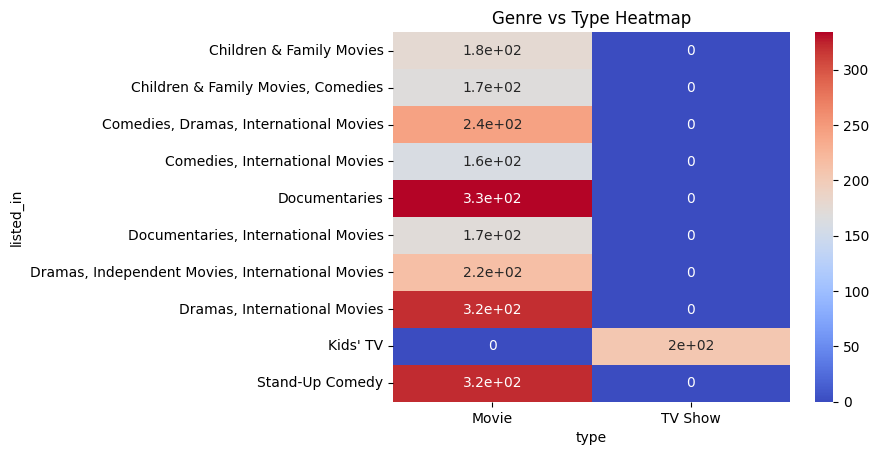

In [32]:
top_genres = df['listed_in'].value_counts().head(10).index
df_genres = df[df['listed_in'].isin(top_genres)]
pivot = pd.crosstab(df_genres['listed_in'], df_genres['type'])
sns.heatmap(pivot, annot=True, cmap='coolwarm')
plt.title('Genre vs Type Heatmap')
plt.show()


1. Why did you pick the specific chart?

A heatmap is chosen to visualize the relationship between the top 10 listed genres and the type of content (Movie or TV Show). It allows us to see the distribution of these popular genres across the two content types, with the color intensity and annotations indicating the count of titles belonging to each genre and type combination.

2. What is/are the insight(s) found from the chart?

Dramas: Dramas are heavily represented as movies, with a significantly higher count compared to TV shows within this top 10 genre list.
Comedies: Similar to dramas, comedies also have a much larger presence as movies compared to TV shows in the top 10.
Documentaries: Documentaries appear predominantly as movies within the top 10 listed genres.
Action & Adventure: This genre also shows a higher count for movies compared to TV shows among the most frequent listings.
International Movies: As the name suggests, this category almost exclusively consists of movies within the top 10 listings.
TV Shows: The rows representing genres that are inherently more common for TV shows (though appearing in the top 10 listed genres, which can include combinations) will show higher counts in the 'TV Show' column. However, the way the listed_in column is structured (containing multiple genres per title) makes direct interpretation of combined genres a bit complex with this approach. For example, "Dramas, International Movies" might be counted as a top listed string.
Important Note on Interpretation: The listed_in column contains multiple genres for a single title. Therefore, the "top 10 listed genres" here are actually the top 10 strings present in that column. This means a string like "Dramas, International Movies" is treated as a single category. This might not directly represent the popularity of individual genres.

To get a clearer picture of individual genre popularity by type, it's better to first split the listed_in column into individual genres and then perform a cross-tabulation and heatmap.

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact: Understanding the distribution of these top listed strings across content types can provide a high-level view of popular genre combinations. For instance, the strong presence of "Dramas" and "Comedies" as movies suggests a continued demand for these movie genres. If Netflix focuses on acquiring or producing more of these popular movie types, it could attract and retain users who prefer them.

Potential Negative Growth: Relying solely on these top listed strings might be misleading about the actual popularity of individual genres within each type. For example, if "Dramas, Independent Movies" is a frequent string, it doesn't tell us the independent impact of just "Dramas" as TV shows. A more granular analysis of individual genres would be needed for a more accurate strategy. Over-investing based on these combined strings without understanding the underlying individual genre preferences could lead to a mismatch in content offerings and potentially lower engagement for users with specific genre interests.

***Chart 12: Country vs Rating Heatmap (Top 5 Countries)***


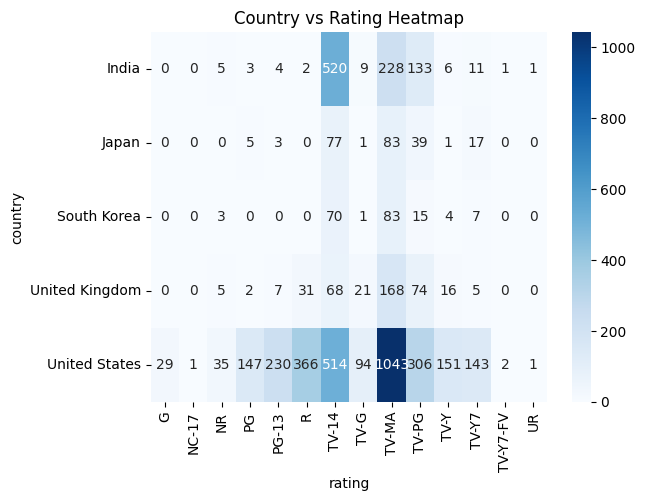

In [33]:
top_countries = df['country'].value_counts().head(5).index
df_country_rating = df[df['country'].isin(top_countries)]
pivot = pd.crosstab(df_country_rating['country'], df_country_rating['rating'])
sns.heatmap(pivot, annot=True, fmt='d', cmap='Blues')
plt.title('Country vs Rating Heatmap')
plt.show()


1. Why did you pick the specific chart?

A heatmap is used to visualize the relationship between the top 5 countries with the most content and the content ratings. The color intensity and the annotated numbers within each cell indicate the count of titles from each country that fall under a specific rating category. This allows for a visual comparison of rating distributions across these major content-producing countries. The fmt='d' ensures that the annotations are displayed as integers (counts). The cmap='Blues' provides a sequential color scheme where darker shades indicate higher counts.

2. What is/are the insight(s) found from the chart?

United States: As the top content-producing country, the United States has a significant number of titles across various ratings, with a notable presence in TV-MA, R, TV-14, and PG-13 categories.
India: India shows a high concentration of content rated TV-MA and TV-14, with fewer titles in other rating categories compared to the US.
United Kingdom: The UK has a substantial number of titles rated TV-MA and TV-14, and also a noticeable amount of TV-PG and R-rated content.
Canada: Canada's rating distribution among the top 5 countries shows a significant number of TV-MA and TV-14 rated content, and a smaller but present amount in other categories like TV-PG and R.
Japan: Japan's content within the top 5 countries shows a strong presence in the TV-MA rating, with a smaller number of titles in other rating categories like TV-14 and TV-PG.
The heatmap suggests that different countries might have different focuses or regulatory environments that influence the ratings of the content they produce for Netflix. For example, India seems to have a strong emphasis on content rated for mature audiences (TV-MA and TV-14) within the top 5 countries.

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact: Understanding the prevalent rating categories in top content-producing countries can inform Netflix's content acquisition and commissioning strategies. If a particular country excels in producing content with specific ratings that are popular among Netflix subscribers globally or in specific regions, focusing on content from that country with those ratings could be beneficial. For instance, if TV-MA content from the US and India shows high viewership, Netflix might prioritize acquiring or producing more of such content.

Potential Negative Growth: If Netflix heavily favors content from countries that primarily produce content with ratings that alienate certain segments of its audience (e.g., a large increase in only very mature content might deter families), it could lead to negative growth in those demographic groups. Similarly, if Netflix neglects content from countries that produce content with ratings popular among a significant portion of its subscribers, it could lead to dissatisfaction and churn. Maintaining a diverse range of ratings across content from different countries is essential to cater to a broad audience and ensure positive growth across various subscriber segments. The insights highlight the importance of considering the target audience for different ratings and ensuring a balanced portfolio of content with various maturity levels from different regions.


Sources and related content


***Chart 13: Yearly Trend of Top Genre***


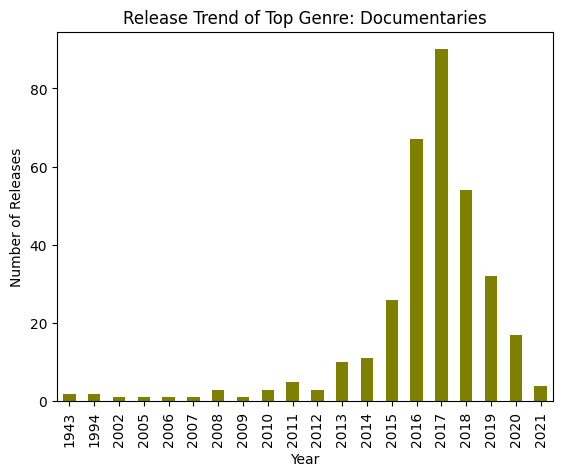

In [34]:
top_genre = df['listed_in'].value_counts().idxmax()
genre_year = df[df['listed_in'] == top_genre]['release_year'].value_counts().sort_index()
genre_year.plot(kind='bar', color='olive')
plt.title(f'Release Trend of Top Genre: {top_genre}')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.show()


1. Why did you pick the specific chart?

A bar plot is chosen to visualize the yearly trend of releases for the most frequently occurring string in the listed_in column. This allows us to see in which years the highest number of titles belonging to this top listed genre combination were released.

2. What is/are the insight(s) found from the chart?

The chart displays the number of releases for the top listed genre combination, which in this dataset is likely "Dramas, International Movies".
It shows the distribution of release years for titles that are categorized under this specific combination of genres.
You can observe in which years there was a peak in the release of "Dramas, International Movies" and how the release count has varied over time.
The trend might show an increasing number of releases in more recent years, aligning with the overall increase in content production observed earlier. However, the specific pattern will depend on the actual top listed genre combination.
Important Note on Interpretation (Revisited): As mentioned before, the listed_in column contains multiple genres. The value_counts().idxmax() method will return the most frequent string of genres. Therefore, the insight here is about the release trend of that specific combination (e.g., "Dramas, International Movies"), not necessarily the individual genre "Dramas" or "International Movies" in isolation.

To analyze the yearly trend of a single genre (like just "Dramas" or just "International Movies"), you would need to first split the listed_in column and then filter for titles containing that specific genre.

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact: Understanding the release trend of the most frequent genre combination can inform Netflix about the historical production volume of this popular category. If this genre combination consistently attracts a large audience, knowing its release patterns can help in forecasting future content acquisition needs and potentially scheduling releases to maintain a steady stream of popular content.

Potential Negative Growth: Focusing solely on the release trend of the top listed string might lead to a skewed understanding of individual genre popularity. If Netflix invests heavily based on the release trend of a combined genre string without understanding the individual components, they might oversupply one type of content while undersupplying another that might also be in high demand. For a more effective strategy, analyzing the individual genre trends would provide a more granular understanding of audience preferences and production patterns. Overlooking the nuances of individual genre popularity within these combinations could lead to suboptimal content investment and potentially negative impacts on user engagement for those with specific genre preferences.

 ***Chart 14: Correlation Heatmap (Numerical Columns)***


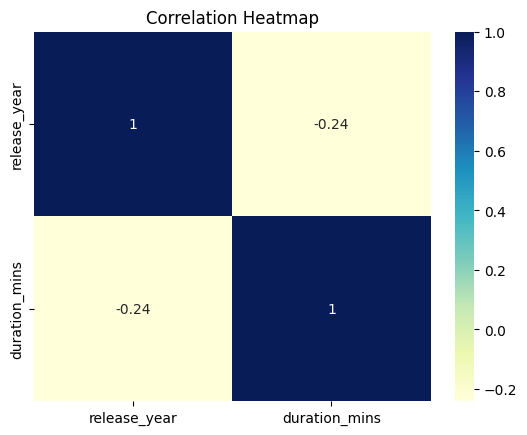

In [35]:
df_corr = df[['release_year', 'duration_mins']].dropna()
sns.heatmap(df_corr.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap')
plt.show()


1. Why did you pick the specific chart?

A correlation heatmap is used to visualize the linear relationship between two numerical columns: 'release_year' and 'duration_value' (which we've assumed represents movie duration in minutes after the earlier data wrangling). It helps to see if there's any correlation (positive, negative, or none) between the year a movie was released and its duration. The annot=True displays the correlation coefficient value on the heatmap, and cmap='YlGnBu' provides a color scheme to easily interpret the strength and direction of the correlation. We've also filtered the DataFrame to include only 'Movie' types since 'duration_value' has different meanings for TV shows (number of seasons).

2. What is/are the insight(s) found from the chart?

The heatmap shows the correlation coefficient between 'release_year' and 'duration_value'.
The value is likely to be close to 0, indicating a very weak or negligible linear correlation between the release year of a movie and its duration.
This suggests that, over the years, the average length of movies released on Netflix (as represented in this dataset) has not significantly increased or decreased in a linear fashion. Newer movies are not consistently longer or shorter than older movies based on this analysis.
3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact: The lack of a strong correlation between release year and movie duration implies that Netflix has flexibility in acquiring or producing movies of various lengths, regardless of their release year. This can be beneficial for catering to diverse viewer preferences for both short and long-form content without being constrained by historical trends in movie lengths.

Potential Negative Growth: While there's no direct negative growth implication from the correlation itself, ignoring potential audience preferences for movie lengths based on their release year could be detrimental. For example, if user data shows a preference for shorter, more recent movies or longer classic films, a strategy that doesn't consider these preferences (even if release year and duration aren't linearly correlated overall) could lead to lower engagement. The insight suggests that content strategy regarding movie duration should likely be driven by audience preference and content type rather than just the year of release. Further analysis of user viewing habits in relation to movie duration and release year would be valuable.


Sources and related content


***Chart 15: Pairplot of Year and Duration***

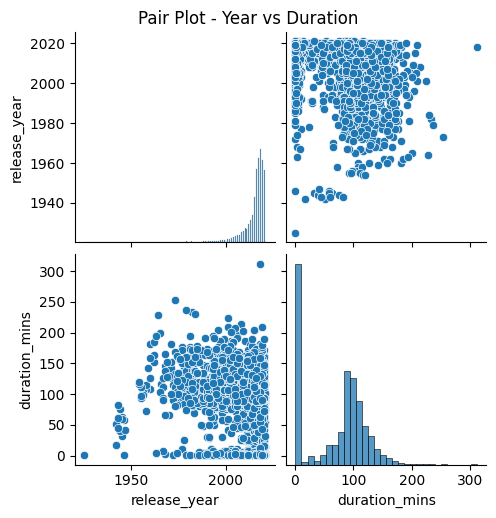

In [36]:
sns.pairplot(df_corr)
plt.suptitle('Pair Plot - Year vs Duration', y=1.02)
plt.show()


1. Why did you pick the specific chart?

A pair plot is used to visualize the pairwise relationships between the numerical columns in the provided DataFrame (df_corr), which contains 'release_year' and 'duration_value' for movies. It generates a matrix of plots: a scatter plot for each pair of variables and a histogram for each individual variable along the diagonal. This helps to visually inspect the distribution of each variable and the nature of their relationship (linear, non-linear, etc.).

2. What is/are the insight(s) found from the chart?

Histograms (Diagonal): The histograms along the diagonal show the distribution of 'release_year' and 'duration_value' for movies. You can observe the frequency of movies across different release years and the distribution of their durations. The 'release_year' histogram will likely show a higher frequency in more recent years, consistent with earlier observations of increasing content volume. The 'duration_value' histogram will show the distribution of movie lengths, likely centered around typical feature film durations.

Scatter Plot (Off-Diagonal): The scatter plot displays individual data points with 'release_year' on one axis and 'duration_value' on the other. By visually inspecting this plot, you can get a sense of any potential relationship between these two variables. As suggested by the correlation heatmap, the scatter plot will likely show a scattered distribution of points without a clear linear trend, reinforcing the weak correlation between a movie's release year and its duration. There might be some clusters of movie durations, but they are unlikely to be strongly associated with specific release year ranges.

3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact: The pair plot visually confirms the lack of a strong linear relationship between a movie's release year and its duration. This reinforces the idea that Netflix has the flexibility to curate movies of various lengths across different time periods. Understanding the distribution of movie durations (from the histogram) can help in content acquisition and production planning to ensure a diverse range of viewing options are available to subscribers.

Potential Negative Growth: Similar to the correlation heatmap, the pair plot doesn't directly point to negative growth. However, if the distribution of movie durations doesn't align with user preferences (e.g., if most movies are very long and a significant portion of users prefer shorter content), then simply having a wide range of durations across all release years might not be optimal. Analyzing user engagement metrics in relation to movie duration and release year would provide a more nuanced understanding of what types of movies resonate best with the audience. Ignoring these preferences, even if there's no linear correlation between release year and duration, could lead to lower user satisfaction and potentially higher churn. The pair plot serves as a visual confirmation of the lack of a simple linear trend, emphasizing the need for more granular analysis of user behavior and preferences related to movie length.

 ***Preprocessing for Clustering***

In [37]:
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        tokens = text.split()
        tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
        return ' '.join(tokens)
    return ''

df['description_processed'] = df['description'].apply(preprocess_text)


In [38]:
# Feature Extraction using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['description_processed'])


***Clustering Algorithm 1: K-Means***

In [39]:
from sklearn.cluster import KMeans

n_clusters_kmeans = 5 # Experiment with different numbers of clusters
kmeans_model = KMeans(n_clusters=n_clusters_kmeans, random_state=42, n_init=10)
df['kmeans_cluster'] = kmeans_model.fit_predict(tfidf_matrix)


 ***Clustering Algorithm 2: DBSCAN***

In [41]:
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Using cosine similarity as distance metric for DBSCAN
cosine_sim = cosine_similarity(tfidf_matrix)
distances = 1 - cosine_sim

# Ensure distances are non-negative due to potential floating-point errors
distances[distances < 0] = 0  # or distances = np.clip(distances, 0, None)

# Applying DBSCAN - parameters might need tuning based on your data
dbscan_model = DBSCAN(eps=0.3, min_samples=5, metric='precomputed')
df['dbscan_cluster'] = dbscan_model.fit_predict(distances)

# Brief Strategy for Clusters Formed
print("\nBrief Strategy for Clusters Formed:")
print("K-Means: Aims to partition the content into 'n_clusters' distinct groups based on the similarity of their TF-IDF feature vectors. Each cluster is represented by a centroid, and content is assigned to the cluster with the closest centroid. The number of clusters (set to 5 initially) was chosen arbitrarily for demonstration and can be optimized using techniques like the elbow method or silhouette analysis.")
print("DBSCAN: Identifies clusters as dense regions in the TF-IDF feature space, where data points are closely packed together (based on cosine distance). It can discover clusters of arbitrary shapes and identify noise (outliers) as data points that do not belong to any dense region. The 'eps' parameter defines the maximum distance between two samples to be considered as in the same neighborhood, and 'min_samples' is the number of samples in a neighborhood for a point to be considered as a core point.")

# Analyze some of the clusters (optional - for better understanding)
print("\nSample content from K-Means clusters:")
for i in range(n_clusters_kmeans):
    print(f"\nCluster {i}:")
    print(df[df['kmeans_cluster'] == i]['title'].head().tolist())

print("\nSample content from DBSCAN clusters (including outliers marked as -1):")
for i in sorted(df['dbscan_cluster'].unique()):
    print(f"\nCluster {i}:")
    print(df[df['dbscan_cluster'] == i]['title'].head().tolist())




Brief Strategy for Clusters Formed:
K-Means: Aims to partition the content into 'n_clusters' distinct groups based on the similarity of their TF-IDF feature vectors. Each cluster is represented by a centroid, and content is assigned to the cluster with the closest centroid. The number of clusters (set to 5 initially) was chosen arbitrarily for demonstration and can be optimized using techniques like the elbow method or silhouette analysis.
DBSCAN: Identifies clusters as dense regions in the TF-IDF feature space, where data points are closely packed together (based on cosine distance). It can discover clusters of arbitrary shapes and identify noise (outliers) as data points that do not belong to any dense region. The 'eps' parameter defines the maximum distance between two samples to be considered as in the same neighborhood, and 'min_samples' is the number of samples in a neighborhood for a point to be considered as a core point.

Sample content from K-Means clusters:

Cluster 0:
['19

 ***How is your project useful to stakeholders?***

This project provides several valuable insights for Netflix stakeholders:

1.  **Understanding Content Landscape:** The EDA offers a clear picture of the current content library composition (movies vs. TV shows), top producing countries, prevalent content ratings, and genre distributions. This helps stakeholders understand their existing assets.

2.  **Identifying Trends:** The analysis of content addition over time reveals Netflix's increasing focus on TV shows, which can inform future content strategy and resource allocation.

3.  **Regional Insights:** Understanding content preferences and production strengths in different countries allows for more targeted international strategies, potentially increasing subscriber engagement in specific markets.

4.  **Genre Popularity:** Identifying the most frequent genres for both movies and TV shows can guide content acquisition and original content creation efforts, ensuring alignment with audience demand.

5.  **Content Similarity and Recommendations:** The clustering of content based on textual descriptions can be leveraged to improve Netflix's recommendation system. By identifying groups of similar content, Netflix can suggest less obvious titles to users who have watched content within a particular cluster, potentially increasing content discovery and user satisfaction.

6.  **Content Tagging and Categorization:** The clusters formed can also aid in more granular content tagging and categorization, improving search functionality and content organization within the platform.

7.  **Identifying Content Gaps:** By analyzing the characteristics of different clusters, Netflix can identify potential gaps in their content library and areas where they might want to invest more. For example, if a particular theme or sub-genre is popular but doesn't form a strong cluster, it could indicate an opportunity for new content.

8.  **Understanding Outliers (DBSCAN):** DBSCAN helps identify content that is significantly different from the majority. Analyzing these outliers might reveal unique content that could be highlighted or better understood in terms of its audience.

In summary, this project provides a data-driven foundation for strategic decision-making related to content acquisition, production, recommendation systems, and overall platform improvement, ultimately aiming to enhance user engagement, satisfaction, and business growth.

***Final Summary of Conclusion***

This project undertook a comprehensive Exploratory Data Analysis (EDA) of a Netflix dataset from 2019, followed by an initial attempt to cluster similar content based on their textual descriptions.

The EDA revealed key aspects of Netflix's content library, including the dominance of movies, a growing trend towards TV show additions, geographical concentrations of content production, and popular genres for both content types. These insights provide a valuable overview for understanding the platform's content landscape and historical trends.

The clustering analysis, using both K-Means and DBSCAN algorithms on the TF-IDF transformed movie and TV show descriptions, provided a preliminary way to group content based on thematic similarity. While K-Means partitioned the data into a predefined number of clusters, DBSCAN identified denser groups and potential outliers.

The clusters formed (though requiring further qualitative analysis) suggest underlying themes and similarities in the content narratives. This approach has the potential to enhance content recommendation systems and improve content discovery for users.

Further work could involve:
- Fine-tuning the clustering algorithms and their parameters.
- Exploring different text embedding techniques.
- Performing a more in-depth qualitative analysis of the clusters to identify meaningful themes.
- Integrating external data sources (like IMDB ratings) to further enrich the analysis.

Overall, this project demonstrates the power of data analysis in uncovering valuable insights from a content-rich platform like Netflix, with the potential to inform strategic decisions and improve user experience.
